In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from textblob import TextBlob
   

In [4]:
df = pd.read_csv("student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [5]:
df.drop(columns=['Unnamed: 0', 'Student ID'],inplace=True)

In [6]:
mean_scores = df.mean().sort_values(ascending=False)
mean_scores

Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64

Text(0.5, 0, 'Average Score')

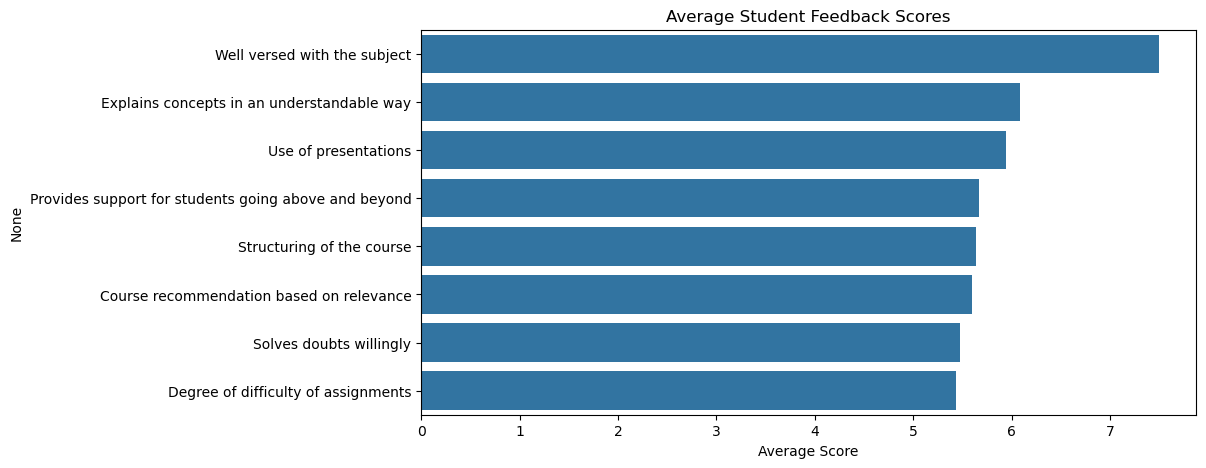

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=mean_scores.values, y=mean_scores.index)
plt.title("Average Student Feedback Scores")
plt.xlabel("Average Score")  # Added the missing closing quotation mark and parenthesis

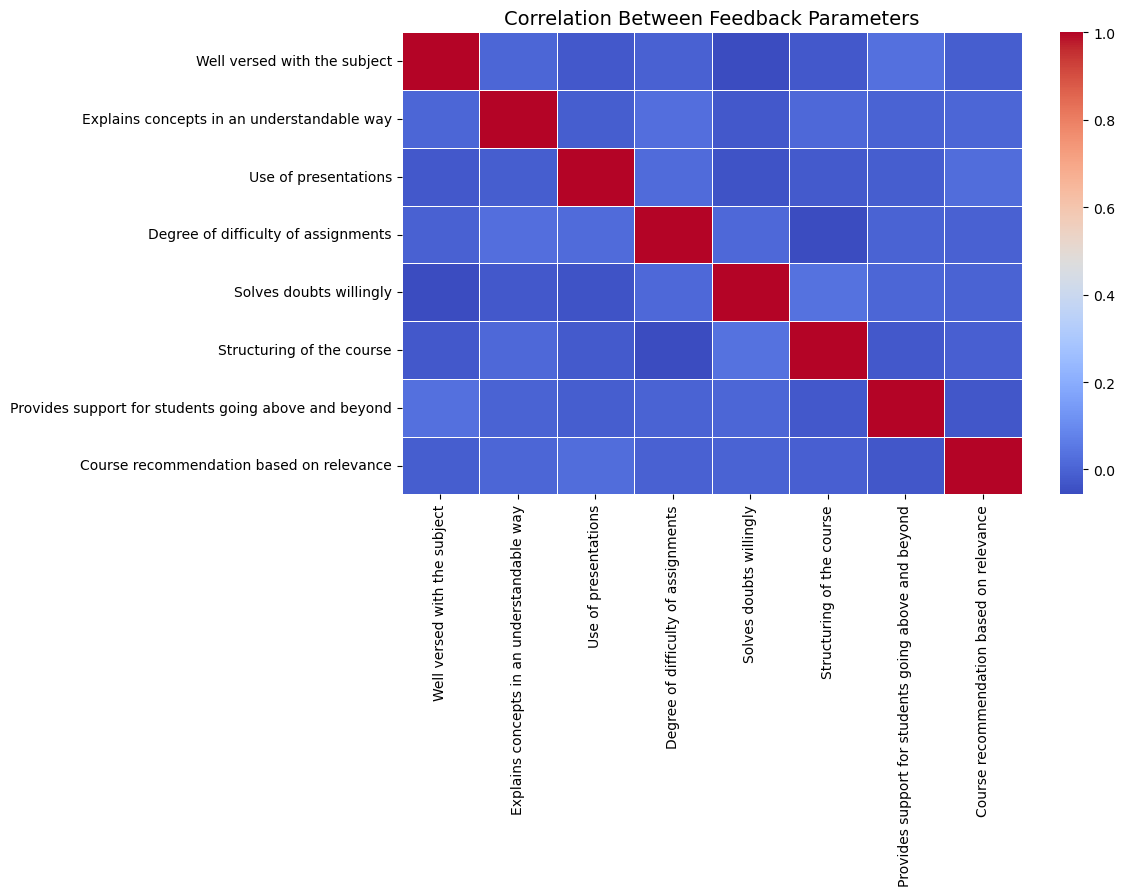

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Correlation Between Feedback Parameters", fontsize=14)
plt.show()

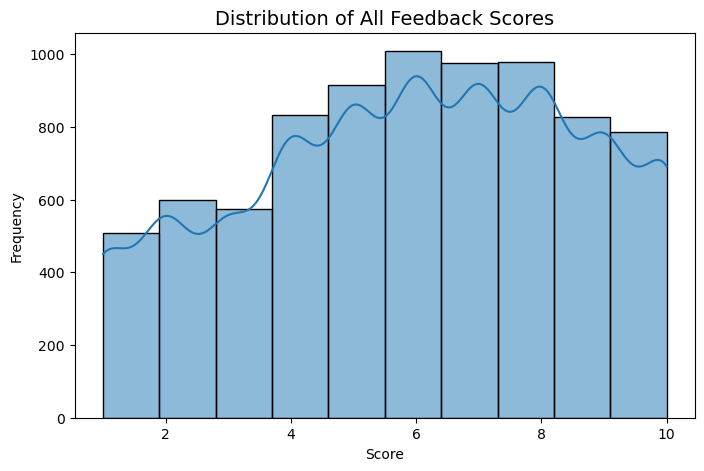

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df.values.flatten(), bins=10, kde=True)

plt.title("Distribution of All Feedback Scores", fontsize=14)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Convert numeric feedback into text feedback
def score_to_text(score):
    if score >= 7:
        return "Very satisfied with the event"
    elif score >= 5:
        return "Satisfied with the event"
    elif score >= 3:
        return "Neutral experience"
    else:
        return "Not satisfied with the event"

df['Text_Feedback'] = df.mean(axis=1).apply(score_to_text)

df[['Text_Feedback']].head()

,Text_Feedback
0,Satisfied with the event
1,Neutral experience
2,Neutral experience
3,Satisfied with the event
4,Very satisfied with the event


In [20]:
from textblob import TextBlob

df['Sentiment_Score'] = df['Text_Feedback'].apply(
    lambda x: TextBlob(x).sentiment.polarity
)

def sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Sentiment_Score'].apply(sentiment_label)

df[['Text_Feedback', 'Sentiment']].head()

,Text_Feedback,Sentiment
0,Satisfied with the event,Positive
1,Neutral experience,Neutral
2,Neutral experience,Neutral
3,Satisfied with the event,Positive
4,Very satisfied with the event,Positive


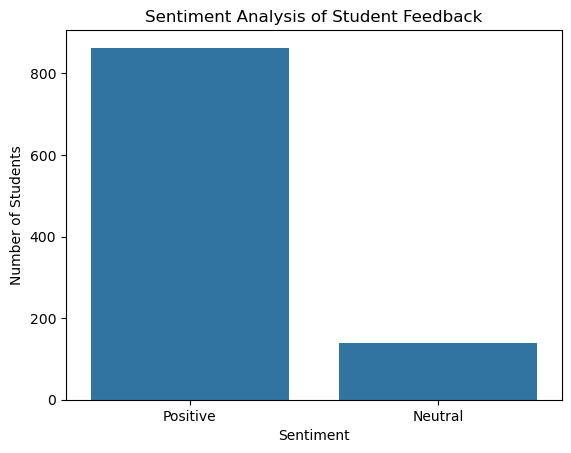

In [21]:
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Analysis of Student Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Number of Students")
plt.show()